# Week 5, Lab \#4

*February 11, 2026*

```sh
# Possibly required
pip install requests numpy
```

In today's lab, we'll practice working with NumPy arrays using two different climate datasets:

- [A record of ice break-up on the Nenana River in Alaska.](https://nsidc.org/data/nsidc-0064/versions/2)
- [Soil temperatures from the Montana AgriMet station in Corvallis, Montana.](https://mesonet.climate.umt.edu/dash/)

## Lab 4, Part 1: Nenana Ice Classic

Every year, Alaska residents compete to guess when the ice in the Nenana River in central Alaska will break up, enabling navigation of this historically important waterway. [Participants bet the exact minute when the ice will break up](https://www.nenanaakiceclassic.com/) and the a correct guess can net winners tens or hundreds of thousands of dollars!

Below is some Python code I provided to prepare the data for you: **a NumPy array with 105 rows, one for each (contest) year. The two columns represent the Julian date of the year and the hour when the ice broke up, respectively.**

(The Julian day is a number between 1 and 365, or between 1 and 366 in leap years.)

In [1]:
import requests
import numpy as np

content = requests.get('http://files.ntsg.umt.edu/data/GIS_Programming/data/NenanaIceClassic_1917-2021_105x2_JDate+Hour.flt32')
data = np.frombuffer(content.content, dtype = np.float32)\
    .reshape((105, 2))

The first six rows of the `data` array look like this. The first column is the Julian date, the second column is the hour of break-up.

In [2]:
data[:6]

array([[120.4792,  11.    ],
       [131.3979,   9.    ],
       [123.6063,  14.    ],
       [132.4486,  10.    ],
       [131.2792,   6.    ],
       [132.5556,  13.    ]], dtype=float32)

For example:

- A Julian date of 120.4 means the ice broke up on the 120th day of the year at the hour `0.4 * 24 = 9.6` (9:36 AM local time).

[**This table will help you convert between calendar days (Month, Day) and Julian days.**](https://www.cdfa.ca.gov/ahfss/mpes/pdfs/Julian_Calendar.pdf)

If you're trying to get the integer part of a number, remember that you can use `int()` without worrying about rounding:

In [3]:
int(120.99)

120

---

## Problem 4.1: Average Break-Up Date

With no other information available to us, the mean Julian date of break-up might be the best prediction for this year's break-up.

Write Python code that determines:

- The earliest (Julian) day of break-up
- The latest (Julian) day of break-up
- The mean (Julian) day of break-up

For each of these, your Python code should **print a single numeric value,** *not* an array of more than one value; i.e., you may need to index an array to get a single value.

### Solution 4.1:

In [4]:
# isolate the Julian day column (first column)
julian_days = data[:, 0]

# use built-in functions to get smallets, largest, and average
earliest = julian_days.min()
latest = julian_days.max()
mean_day = julian_days.mean()

print("The earliest (Julian) day of break-up: " + str(earliest))
print("The latest (Julian) day of break-up: " + str(latest))
print("The mean (Julian) day of break-up: " + str(mean_day))

The earliest (Julian) day of break-up: 104.0146
The latest (Julian) day of break-up: 141.4868
The mean (Julian) day of break-up: 124.54447


---

## Problem 4.2: Early Break-Up

**In which years did the Nenana break-up occur before May 1?** Write Python code to answer this question. 

May 1 is the 121st day of the year, at the earliest (depending on whether or not it is a leap year), but *let's pretend that every year is a standard (non-leap) year.* **Recall that the years in this dataset range from 1917 to 2021, inclusive.**

**Hint:** There are multiple ways to solve this problem and they might involve functions like `np.arange()` or `np.argwhere()`, if you're looking for a place to start.

### Solution 4.2:

In [5]:
# set starting year for loop counter
year = 1917

# for each array in the range of the number of arrays, save both parts of the entry (Julian day / Hour), and if the given entry's day is under 121, then print out the current loop counter for the year and the Julian day value
for i in range(0, len(data)):
    entry = data[i]
    day = entry[0]
    hour = entry[1]
    if day < 121:
        print(str(year) + ": " + str(day))
    year+=1

1917: 120.4792
1926: 116.6688
1934: 120.5882
1939: 119.5597
1940: 111.6438
1942: 120.5611
1943: 118.8069
1951: 120.7458
1953: 119.6625
1958: 119.6222
1969: 118.5194
1978: 120.6375
1979: 120.7611
1980: 120.5528
1981: 120.7806
1983: 119.7757
1988: 118.3854
1990: 114.7215
1993: 113.5424
1994: 119.959
1995: 116.5569
1997: 120.4361
1998: 110.7042
1999: 119.9076
2003: 119.7653
2004: 115.5944
2005: 118.5007
2007: 117.6576
2010: 119.3792
2012: 114.8188
2014: 115.6583
2015: 114.6007
2016: 114.6521
2019: 104.0146
2020: 118.5389
2021: 120.5347


In [6]:
## Repeat but this time save list of the values to print out all the years
preMay_years = []

# set starting year for loop counter
year = 1917

# for each array in the range of the number of arrays, save both parts of the entry (Julian day / Hour), and if the given entry's day is under 121, then save the value of the current loop counter for the year and the Julian day value
for i in range(0, len(data)):
    entry = data[i]
    day = entry[0]
    hour = entry[1]
    if day < 121:
        preMay_years.append(year)
    year+=1

print("Years with pre-May 1st breakup: " + str(preMay_years))

Years with pre-May 1st breakup: [1917, 1926, 1934, 1939, 1940, 1942, 1943, 1951, 1953, 1958, 1969, 1978, 1979, 1980, 1981, 1983, 1988, 1990, 1993, 1994, 1995, 1997, 1998, 1999, 2003, 2004, 2005, 2007, 2010, 2012, 2014, 2015, 2016, 2019, 2020, 2021]


---

## Problem 4.3: Hour of Break-up

Using either:

- A `for` loop, or
- A Python function

**Write Python code that determines the most common hour of break-up.** There may be two or more hours tied for the most common! Be sure to note whether or not this is the case. Recall that `data[:,1]` is a Python expression that will get you an array of the hours of break-up.

**Hints:** 

- Remember that a Python `dict` can be used to count the occurence of unique items, because `dict` keys must be unique.
- If you have an array of the hours of break-up, recall that you can use conditional expressions on arrays to find where certain values occur. Boolean arrays, e.g., `np.array([True, False, True])`, can be summed up to count the `True` entries.

### Solution 4.3:

In [7]:
# build a dictionary of the count of each hour
counts = {}
for i in range(len(data)):
    h = int(data[i][1])
    if h in counts:
        counts[h] += 1
    else:
        counts[h] = 1

# compute the maximum count
max_count = max(counts.values())

# collect all hours that have that maximum count (including ties)
most_common_hours = []
for h, c in counts.items():
    if c == max_count:
        most_common_hours.append(h)

print("Most common hour(s) of break-up:" + str(most_common_hours))
print("Number of occurrences:" + str( max_count))

Most common hour(s) of break-up:[15, 12]
Number of occurrences:11


---

## Lab 4, Part 2: Corvallis Soil Temperatures

In this next section, we'll use data on soil temperatures from the AgriMet station in Corvallis, MT.

The `temps` array, below, contains soil temperatures for each of 4 soil layers (depths below) from 2017-01-01 through 2022-12-31.

- 10 cm depth
- 20 cm depth
- 50 cm depth
- 90 cm depth

*Note:* I have modified this time series so that there is no February 29 in 2022; i.e., there are no leap years in these data.

In [8]:
content = requests.get('http://files.ntsg.umt.edu/data/GIS_Programming/data/MT_AgriMet_soil_temps_Corvallis_20170101-20221231_2190x4.float32')
temps = np.frombuffer(content.content, dtype = np.float32)\
    .reshape((2190, 4))

temps.shape

(2190, 4)

## Problem 4.4: Soil Temperature Profile

Write Python code to calculate the range (maximum minus minimum) in soil temperatures for each depth.

**Hint:** The `temps` data contains `np.nan`.

### Solution 4.4:

In [9]:
# save list of cm values
depth_labels = ["10 cm", "20 cm", "50 cm", "90 cm"]

# Loop through each of the 4 columns
for col in range(4):
    # isolate all temperature values for this depth
    depth_data = temps[:, col]
    # find the maximum temperature for this depth, ignoring any missing values (np.nan)
    max_temp = np.nanmax(depth_data)
    # find the minimum temperature for this depth, ignoring any missing values (np.nan)
    min_temp = np.nanmin(depth_data)
    # range = max - min
    temp_range = max_temp - min_temp
    # print the depth and its temperature range
    print(depth_labels[col], "range:", temp_range)

10 cm range: 76.968
20 cm range: 56.876
50 cm range: 45.117
90 cm range: 36.488003


---

## Problem 4.5: Plotting Soil Temperatures

**Make a line plot showing the soil temperature in each layer over time.** The horizontal axis should indicate time, which could be as simple as the (daily) numeric index of time (1 through 2190). Each soil layer should be plotted separately, using a different color. **Add a legend using `pyplot.legend()`; the legend should indicate the depth of the soil, in centimeters.** Check out:

```python
help(pyplot.plot)
```

**Hint:** `matplotlib.pyplot` makes this problem easier to solve than it may seem. There is a lot built into `pyplot.plot()`.

### Solution 4.5:

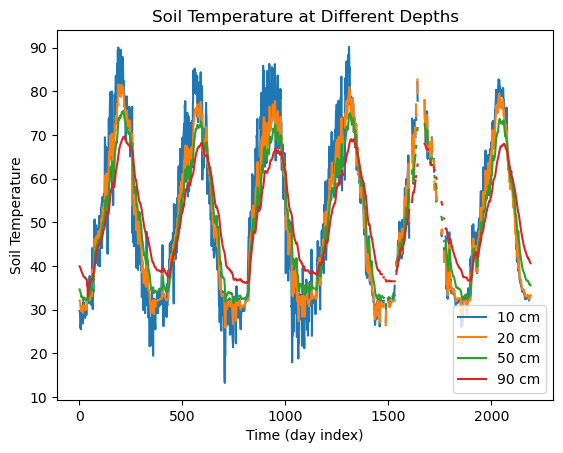

In [10]:
import numpy as np
from matplotlib import pyplot as plt

# create a time axis 1 through 2190 for daily index
t = np.arange(1, temps.shape[0] + 1)

# plot each soil layer as its own line
plt.plot(t, temps[:, 0], label="10 cm")
plt.plot(t, temps[:, 1], label="20 cm")
plt.plot(t, temps[:, 2], label="50 cm")
plt.plot(t, temps[:, 3], label="90 cm")

# show plot
plt.xlabel("Time (day index)")
plt.ylabel("Soil Temperature")
plt.title("Soil Temperature at Different Depths")
plt.legend()
plt.show()

---

## Extra Challenge: Soil Temperature Climatology

A **climatology** is a climate record that records the average conditions on each date, month, or year for a certain length of time. For example, a monthly air temperature climatology would consist of 12 values: the mean monthly air temperature in each month.

**Write Python code to compute a 365-day soil temperature climatology for each soil layer.** That is, there should be an average soil temperature value, for each soil layer, for each day of a 365-day year.

**Hint:** The easiest way to do this would be to reshape the `temps` array *so that you can calculate the average along a certain axis.* Assume there are 365 days in each year in this (6-year) record.

---

## Extra Challenge: Plotting Soil Temperatures

Using `matplotlib.pyplot()`, create a line plot showing the 365-day soil temperature climatology for each soil layer. The temperature in each soil layer should be shown as a separate line, using a separate color, with a legend to differentiate the soil depths. The horizontal (X) axis should show the day of year. As usual, this is not for extra credit, just for extra fun.